In [1]:
import numpy as np

In [2]:
def rho0extraction(tau, r_in, r_out, k):

    # tau = 10.0 * 10**-4###at lambda = 10 micron
    K_abs = 2.350E+03 #/10**4 #### to convert to m^2/g
    K_abs = 3E-3

    # tau = 100.0 * 10**-4###at lambda = 100 micron
    # K_abs = 5.827E+01 * 10**-4 #### at lambda = 100 micron

    rhs = r_in/(k-1) * (1 - (r_out/r_in)**(1-k))
    # print('rhs' , rhs)
    rho = tau/(K_abs*rhs)
    return rho

In [3]:
def sigmaextraction(tau, r_in, r_out, k):
    rho0 = rho0extraction(tau, r_in, r_out, k)
    rho_out = rho0 * (r_in/r_out)**(k)
    sigma = 4/(3-k) * rho_out * r_out *(1-(r_in/r_out)**(3-k))
    return sigma


In [4]:
def Mextraction(tau, r_in, r_out, k):
    ######## checked, this really should be correct
    rho0 = rho0extraction(tau, r_in, r_out, k)
    print(rho0)
    rho_c = rho0*((r_in/r_out)**k)

    M_dust = 4*np.pi/3 * (rho_c*r_out**3-rho0*r_in**3)
    M_dust_2 = sigmaextraction(tau, r_in, r_out, k) * np.pi * r_out**2
    print('M_dust', M_dust/1.989e33, M_dust_2/1.989e33)
    return M_dust/1.989e33

In [5]:
def Lextraction(r_in, r_out, k):
    L_1 = 10**4
    L = L_1*(r_out/r_in)**2
    return L

In [6]:
def extract_r1_values(filename):
    r1_values = []
    tau_values = []
    in_results_section = False
    
    with open(filename, 'r') as file:
        for line in file:
            if 'RESULTS:' in line:
                in_results_section = True
                continue

            if in_results_section:
                # Skip headers and separators
                if line.strip().startswith('###') or line.strip().startswith('===') or not line.strip():
                    continue

                # Process data lines
                parts = line.split()
                if len(parts) >= 5:
                    try:
                        tau_value = float(parts[1])  # 1st column (0-indexed)
                        r1_value = float(parts[3])  # 4th column (0-indexed)
                        tau_values.append(tau_value)
                        r1_values.append(r1_value) #100
                    except ValueError:
                        pass  # Skip lines that don't have valid numerical data
    return r1_values, tau_values

# Example usage
# filename = '100K.out'
# r1_values = extract_r1_values(filename)
# print(r1_values, 'in cm')
print(extract_r1_values('100K.out'))

([2.38e+17, 3.84e+17, 6.37e+17, 9.33e+17], [1.0, 2.62, 6.87, 18.0])


In [7]:
def extract_values(filename): 

    r_in_values = []
    r_out_values = []
    rho_values = []
    M_values = []
    L_values = []
    sigma_values = []
    r1_values, tau_values = extract_r1_values(filename)

    for i in range(len(r1_values)):
        r_in = r1_values[i]
        r_out = r1_values[i] * 1000
        r_in_values.append(r_in)
        r_out_values.append(r_out)
        tau = tau_values[i]
        
        rho = rho0extraction(tau, r_in, r_out, 2)
        rho_values.append(rho)
        
        M = Mextraction(tau, r_in, r_out, 2)
        M_values.append(M)
        
        L = Lextraction(r_in, r_out, 2)
        L_values.append(L)
        
        sigma = sigmaextraction(tau, r_in, r_out, 2)
        sigma_values.append(sigma)

    print("r_in_values:", r_in_values)
    print("r_out_values:", r_out_values)
    print("rho_values:", rho_values)
    print("M_values:", M_values)
    print("L_values:", L_values)
    print("sigma_values:", sigma_values)
    return r_in_values, r_out_values, rho_values, M_values, L_values, sigma_values

In [8]:
T100K_values = extract_values('100K.out')
T200K_values = extract_values('200K.out')
T300K_values = extract_values('300K.out')
T400K_values = extract_values('400K.out')
T500K_values = extract_values('500K.out')
T600K_values = extract_values('600K.out')
T700K_values = extract_values('700K.out')
T800K_values = extract_values('800K.out')
T900K_values = extract_values('900K.out')
T1000K_values = extract_values('1000K.out')
T1100K_values = extract_values('1100K.out')
T1200K_values = extract_values('1200K.out')
T1300K_values = extract_values('1300K.out')


1.4019621862759117e-15
M_dust 39763672.25740243 119291016.77220728
2.276582137693249e-15
M_dust 271204137.90931666 813612413.7279501
3.598575027146456e-15
M_dust 1956897927.0325131 5870693781.097541
6.437305472675248e-15
M_dust 10999384001.73243 32998152005.19729
r_in_values: [2.38e+17, 3.84e+17, 6.37e+17, 9.33e+17]
r_out_values: [2.38e+20, 3.84e+20, 6.37e+20, 9.33e+20]
rho_values: [1.4019621862759117e-15, 2.276582137693249e-15, 3.598575027146456e-15, 6.437305472675248e-15]
M_values: [39763672.25740243, 271204137.90931666, 1956897927.0325131, 10999384001.73243]
L_values: [10000000000.0, 10000000000.0, 10000000000.0, 10000000000.0]
sigma_values: [1.3333333333333333, 3.493333333333333, 9.16, 24.0]
8.734738228630026e-15
M_dust 1024375.7698060153 3073127.3094180455
1.4191680858347525e-14
M_dust 6979033.56625147 20937100.698754415
2.2473453846002866e-14
M_dust 50175262.36071821 150525787.08215463
4.004004004004004e-14
M_dust 284307027.4741894 852921082.4225683
r_in_values: [3.82e+16, 6.16e+

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
fm = mpl.font_manager
fm._get_fontconfig_fonts.cache_clear()

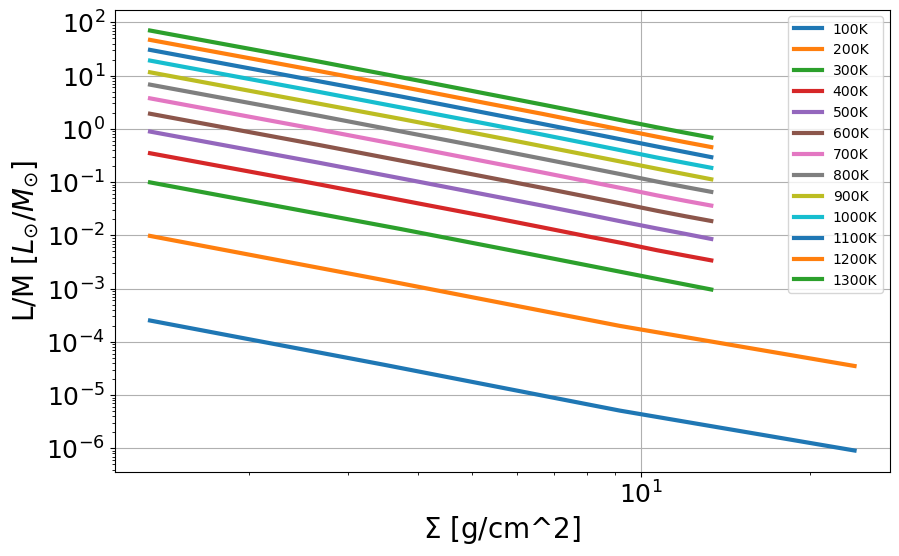

In [11]:

M_values_100 = T100K_values[3]
sigma_values_100 = T100K_values[5]
inverseM_values_100 = [10**4 / M for M in M_values_100]

M_values_200 = T200K_values[3]
sigma_values_200 = T200K_values[5]
inverseM_values_200 = [10**4 / M for M in M_values_200]

M_values_300 = T300K_values[3]
sigma_values_300 = T300K_values[5]
inverseM_values_300 = [10**4 / M for M in M_values_300]

M_values_400 = T400K_values[3]
sigma_values_400 = T400K_values[5]
inverseM_values_400 = [10**4 / M for M in M_values_400]

M_values_500 = T500K_values[3]
sigma_values_500 = T500K_values[5]
inverseM_values_500 = [10**4 / M for M in M_values_500]

M_values_600 = T600K_values[3]
sigma_values_600 = T600K_values[5]
inverseM_values_600 = [10**4 / M for M in M_values_600]

M_values_700 = T700K_values[3]
sigma_values_700 = T700K_values[5]
inverseM_values_700 = [10**4 / M for M in M_values_700]

M_values_800 = T800K_values[3]
sigma_values_800 = T800K_values[5]
inverseM_values_800 = [10**4 / M for M in M_values_800]

M_values_900 = T900K_values[3]
sigma_values_900 = T900K_values[5]
inverseM_values_900 = [10**4 / M for M in M_values_900]

M_values_1000 = T1000K_values[3]
sigma_values_1000 = T1000K_values[5]
inverseM_values_1000 = [10**4 / M for M in M_values_1000]

M_values_1100 = T1100K_values[3]
sigma_values_1100 = T1100K_values[5]
inverseM_values_1100 = [10**4 / M for M in M_values_1100]

M_values_1200 = T1200K_values[3]
sigma_values_1200 = T1200K_values[5]
inverseM_values_1200 = [10**4 / M for M in M_values_1200]

M_values_1300 = T1300K_values[3]
sigma_values_1300 = T1300K_values[5]
inverseM_values_1300 = [10**4 / M for M in M_values_1300]


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sigma_values_100, inverseM_values_100,  label='100K')
plt.plot(sigma_values_200, inverseM_values_200, label='200K')
plt.plot(sigma_values_300, inverseM_values_300, label='300K')
plt.plot(sigma_values_400, inverseM_values_400, label='400K')
plt.plot(sigma_values_500, inverseM_values_500, label='500K')
plt.plot(sigma_values_600, inverseM_values_600, label='600K')
plt.plot(sigma_values_700, inverseM_values_700, label='700K')
plt.plot(sigma_values_800, inverseM_values_800, label='800K')
plt.plot(sigma_values_900, inverseM_values_900, label='900K')
plt.plot(sigma_values_1000, inverseM_values_1000, label='1000K')
plt.plot(sigma_values_1100, inverseM_values_1100, label='1100K')
plt.plot(sigma_values_1200, inverseM_values_1200, label='1200K')
plt.plot(sigma_values_1300, inverseM_values_1300, label='1300K')
plt.yscale('log')
plt.xscale('log')
plt.xticks = [0.1, 1, 10]
# plt.xlim(left=0.15E-5)
# plt.xlim(left=1.2)
plt.style.use('Presentation.mplstyle')
plt.xlabel('$\\Sigma$ [g/cm^2]')
plt.ylabel('L/M [$L_{\\odot}/M_{\\odot}$]')
# plt.title('Plot of L/M vs Sigma')
plt.legend()
plt.grid(True)


plt.show()

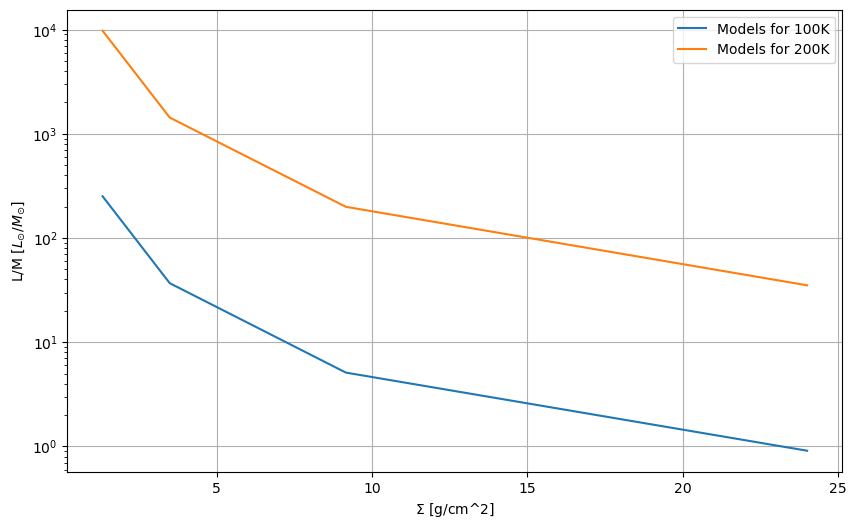

In [12]:
## is this the total mass per unit area or dust mass per unit area?
## we want to make sure this is the total luminosity to total mass ratio



# import matplotlib.pyplot as plt

# Values from the notebook
# L_values = [10000000000.0]
# M_values = [3.2364310526163617e+30]
# sigma_values = [0.04004004004004003]

# Calculate L/M
L_values_100 = T100K_values[4]
M_values_100 = T100K_values[3]
sigma_values_100 = T100K_values[5]
L_M_values_100 = [L / M for L, M in zip(L_values_100, M_values_100)]

L_values_200 = T200K_values[4]
M_values_200 = T200K_values[3]
sigma_values_200 = T200K_values[5]
L_M_values_200 = [L / M for L, M in zip(L_values_200, M_values_200)]



# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sigma_values_100, L_M_values_100,  label='Models for 100K')
plt.plot(sigma_values_200, L_M_values_200, label='Models for 200K')
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('$\\Sigma$ [g/cm^2]')
plt.ylabel('L/M [$L_{\\odot}/M_{\\odot}$]')
# plt.title('Plot of L/M vs Sigma')
plt.legend()
plt.grid(True)
plt.show()

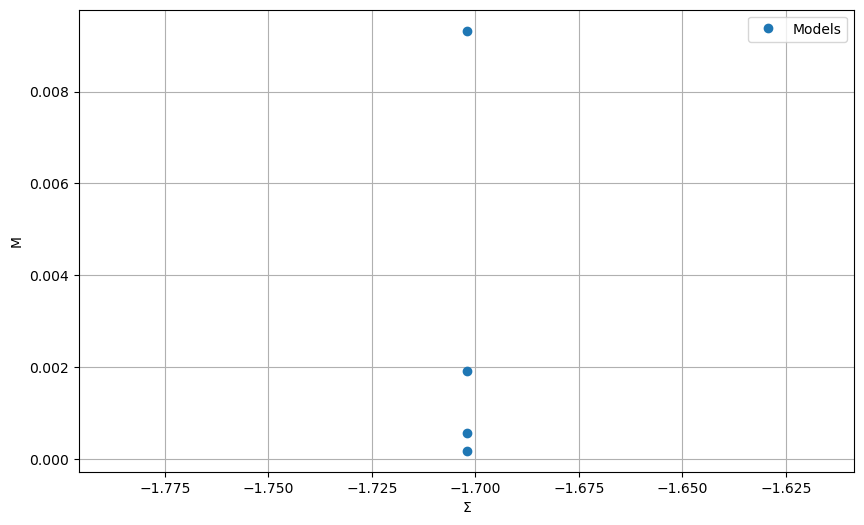

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, M_values, 'o', label='Models')

plt.xlabel('$\\Sigma$')
plt.ylabel('M')
# plt.title('Plot of L/M vs Sigma')
plt.legend()
plt.grid(True)
plt.show()